In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1D convolutions with Numpy

## Full zero padding

In [2]:
x = np.random.rand(500) - 0.5
h = np.ones(5)

y = np.convolve(x, h)

In [3]:
print("Original data shape: {}".format(x.shape))
print("Convolved data shape: {}".format(y.shape))

Original data shape: (500,)
Convolved data shape: (504,)


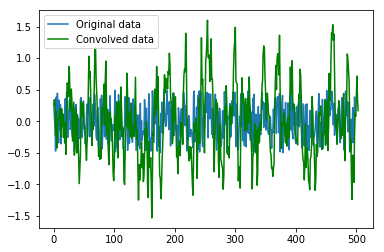

In [4]:
plt.plot(x, label='Original data')
plt.plot(y, label='Convolved data', color='green')
plt.legend()

## Valid zero padding

In [5]:
x = 0.5*np.random.randn(500)
h = np.ones(5)

y = np.convolve(x, h, mode='valid')

In [6]:
print("Original data shape: {}".format(x.shape))
print("Convolved data shape: {}".format(y.shape))

Original data shape: (500,)
Convolved data shape: (496,)


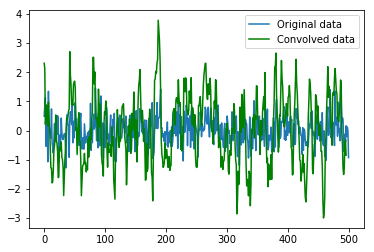

In [7]:
plt.plot(x, label='Original data')
plt.plot(y, label='Convolved data', color='green')
plt.legend()

## Same zero padding

In [8]:
x = np.random.rand(500) - 0.5
h = np.ones(5)

y = np.convolve(x, h, mode='same')

In [9]:
print("Original data shape: {}".format(x.shape))
print("Convolved data shape: {}".format(y.shape))

Original data shape: (500,)
Convolved data shape: (500,)


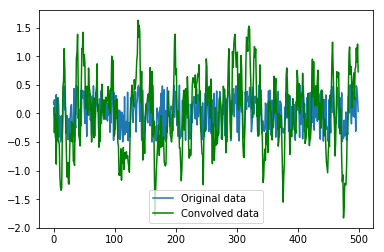

In [10]:
plt.plot(x, label='Original data')
plt.plot(y, label='Convolved data', color='green')
plt.legend()

# 2D convolutions with Scipy

In [34]:
from scipy import signal as sg
from skimage import data, io, color

In [35]:
# Load an image
img = data.hubble_deep_field()
img.shape

(872, 1000, 3)

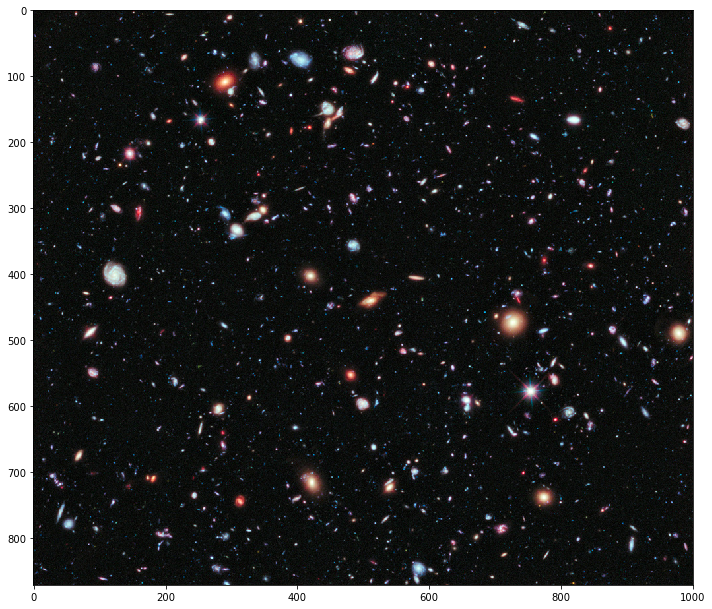

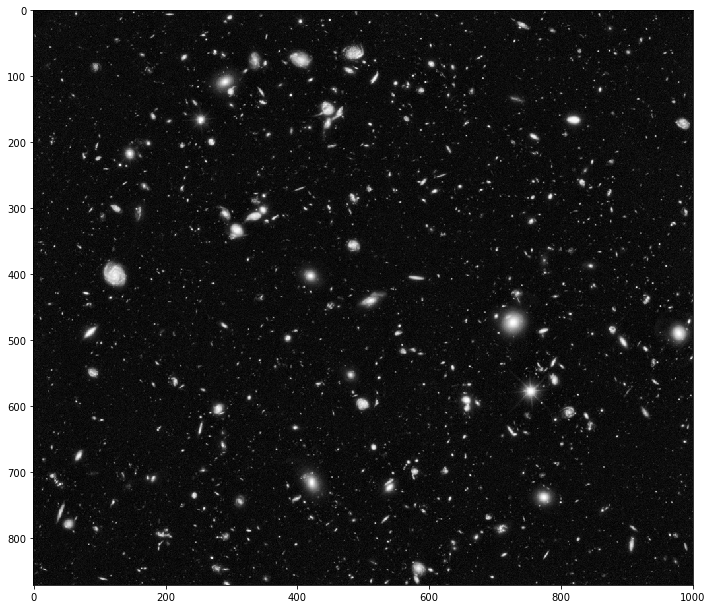

In [36]:
plt.figure(figsize=(10, 10))
io.imshow(img)
x = color.rgb2gray(img)
plt.figure(figsize=(10, 10))
io.imshow(x)

## Vertical edge detector

In [30]:
# Create an edge-detector
h = np.array([[1, 0 , -1], [1, 0, -1], [1, 0, -1]])
h

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [39]:
%time vert_edges = sg.convolve2d(x, h, mode='same')
vert_edges.shape

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 29.5 ms


(872, 1000)

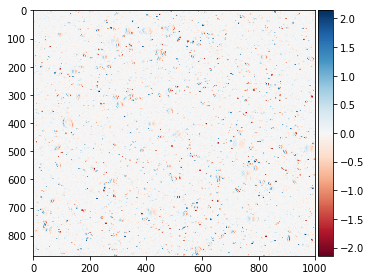

In [40]:
io.imshow(vert_edges)

## Horizontal edge detector

In [41]:
# Create an edge-detector filter
h = np.array([[1, 0 , -1], [1, 0, -1], [1, 0, -1]]).T
h

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [44]:
%time horiz_edges = sg.convolve2d(x, h, mode='same')
horiz_edges.shape

CPU times: user 28 ms, sys: 4 ms, total: 32 ms
Wall time: 30.3 ms


(872, 1000)

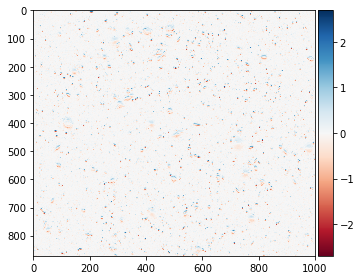

In [45]:
io.imshow(horiz_edges)

## Horizontal + Vertical edges

In [46]:
%time edges = horiz_edges + vert_edges

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.75 ms


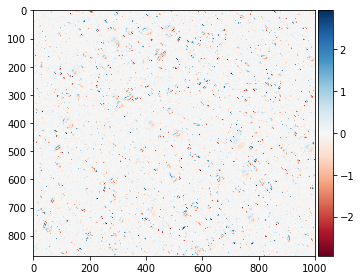

In [47]:
io.imshow(edges)

# Convolutions with TensorFlow

In [48]:
import tensorflow as tf

In [49]:
# Input image
image = tf.placeholder(dtype=tf.float32, shape=[None, None, None, 1])
print('Shape format for INPUT: [batch, in_height, in_width, in_channels]')

Shape format for INPUT: [batch, in_height, in_width, in_channels]


In [50]:
# Kernel
kernel_vals = np.array([[1, 0 , -1], [1, 0, -1], [1, 0, -1]]).T
print('Kernel shape: {}'.format(kernel_vals.shape))
print(kernel_vals)

# Kernel to be used in TF
kernel_nd = kernel_vals[:, :, None, None]
print()
print('Extended kernel shape for conv2d in TensorFlow: {}'.format(kernel_nd.shape))
print('Shape format for KERNELS: [filter_height, filter_width, in_channels, out_channels]')
kernel = tf.Variable(kernel_nd, dtype=tf.float32)

Kernel shape: (3, 3)
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]

Extended kernel shape for conv2d in TensorFlow: (3, 3, 1, 1)
Shape format for KERNELS: [filter_height, filter_width, in_channels, out_channels]


In [51]:
# Define convolutions
stride = 1

stride_tf = [1, stride, stride, 1]  # Stride for each dimension in input, that is: [batch, height, width, channels]
op = tf.nn.conv2d(image, kernel, stride_tf, padding='SAME')

In [53]:
x_nd = x[None, :, :, None]
print('Input image shape for TF: {}'.format(camera_nd.shape))
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    %time result = session.run(op, feed_dict={image: x_nd})
    print('Result shape: {}'.format(result.shape))

Input image shape for TF: (1, 512, 512, 1)
CPU times: user 196 ms, sys: 0 ns, total: 196 ms
Wall time: 31.8 ms
Result shape: (1, 872, 1000, 1)


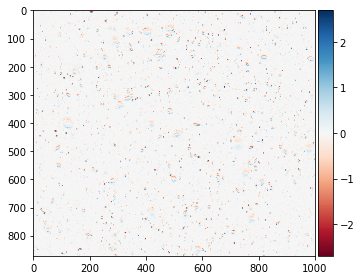

In [54]:
io.imshow(result[0, :, :, 0])